# <span style="color:Purple"> INVESTIGATING THE IMPACT OF SOCIAL MEDIA ON TEENAGERS' MENTAL HEALTH
---

## <span style="color: Blue"> IMPORTS

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## <span style="color:blue"> DATA CLEANING

### Dataset 1:

In [118]:
df1 = pd.read_csv('dataset_1.csv')

In [119]:
df1.head(20)

,Sex,Age,School failure,Whatsapp,W,Facebook,F,Instagram,I,Twitter,...,Perceived loneliness,SM checking,Video-games and online play,Time spent on line playng videogames,BSMAS,BSMAS cut-off underlined,RSES,CSIQ-A,STAI Y-1,STAI Y-2
0,Female,18,No,1,Yes,0,No,1,Yes,0,...,As always,Infrequently (1-2 times),Often,1-3 hours,16,16,26,23,50,53
1,Female,19,Yes,1,Yes,1,Yes,1,Yes,0,...,As always,Infrequently (1-2 times),Infrequently,1-3 hours,9,9,13,29,44,46
2,Male,18,No,1,Yes,0,No,1,Yes,0,...,As always,Never,Sometimes,Approximately one hour,21,21,18,16,37,40
3,Male,17,Yes,1,Yes,1,Yes,1,Yes,0,...,As always,Quite often (every Very often (every 10 minute...,Infrequently,1-3 hours,12,12,19,25,39,50
4,Male,17,No,1,Yes,0,No,1,Yes,0,...,Less alone,Infrequently (1-2 times),Everyday,More than five hours,11,11,18,19,42,48
5,Male,17,No,1,Yes,0,No,1,Yes,0,...,As always,Never,Everyday,1-3 hours,9,9,20,32,47,47
6,Female,18,Yes,1,Yes,1,Yes,1,Yes,0,...,Less alone,Infrequently (1-2 times),Never,I don't play,13,13,17,17,42,48
7,Male,17,No,1,Yes,0,No,1,Yes,0,...,As always,Never,Often,3-5 hours,18,18,19,29,42,50
8,Female,18,No,1,Yes,1,Yes,1,Yes,0,...,As always,Infrequently (1-2 times),Never,I don't play,18,18,19,14,31,42
9,Female,14,No,1,Yes,0,No,1,Yes,0,...,Less alone,Infrequently (1-2 times),Infrequently,I don't play,13,13,24,32,43,51


In [120]:
# Checking column names to decide what to drop

print(df1.columns.tolist())

['Sex', 'Age', 'School failure', 'Whatsapp', 'W', 'Facebook', 'F', 'Instagram', 'I', 'Twitter', 'Tw', 'Snapchat', 'S', 'TikTok', 'Tk', 'Other social', 'O', 'Time spent on social media', 'Daily use of social media', 'Which Device', 'Time flows', 'Perceived anxiety during SM use', 'Perceived loneliness', 'SM checking', 'Video-games and online play', 'Time spent on line playng videogames', 'BSMAS', 'BSMAS cut-off underlined', 'RSES', 'CSIQ-A', 'STAI Y-1', 'STAI Y-2']


In [7]:
# Dropping columns that aren't needed

df1.drop(columns=['W', 'F', 'I', 'Tw', 'S', 'Tk', 'O', 'Video-games and online play', 'Time spent on line playng videogames', 'BSMAS cut-off underlined', 'CSIQ-A', 'STAI Y-1', 'STAI Y-2'], inplace=True)

In [121]:
# Checking they've been dropped

print(df1.columns.tolist())

['Sex', 'Age', 'School failure', 'Whatsapp', 'W', 'Facebook', 'F', 'Instagram', 'I', 'Twitter', 'Tw', 'Snapchat', 'S', 'TikTok', 'Tk', 'Other social', 'O', 'Time spent on social media', 'Daily use of social media', 'Which Device', 'Time flows', 'Perceived anxiety during SM use', 'Perceived loneliness', 'SM checking', 'Video-games and online play', 'Time spent on line playng videogames', 'BSMAS', 'BSMAS cut-off underlined', 'RSES', 'CSIQ-A', 'STAI Y-1', 'STAI Y-2']


In [122]:
# Replacing the values to ensure consistency throughout all datasets

df1.replace({
    'Sex': {'Male': 1, 'Female': 2},
    'Time spent on social media': {'0-2': 0, '2-4': 1, '4-6': 2, '6-8': 3, '8-10': 4, '10 or more': 5},
    'School failure': {'No': 0, 'Yes': 1},
    'Daily use of social media': {'No': 0, 'Yes': 1},
    'Which Device': {'Smartphone': 0, 'Smartphone and computer': 2, 'Other': 3},
    'Time flows': {'Slower': 0, 'As always': 1, 'Faster': 2},
    'Perceived anxiety during SM use': {'Less anxious': 0, 'As always': 1, 'More anxious': 2},
    'Perceived loneliness': {'Less alone': 0, 'As always': 1, 'More alone': 2},
    'SM checking': {'Never': 0, 'Infrequently (1-2 times)': 1, 'Very often (every 10 minutes)': 2, 'Quite often (every Very often (every 10 minutes)0 minutes)': 3}
}, inplace=True)

/var/folders/g7/3m9nbw1j2v19cx8pc81_vvyw0000gn/T/ipykernel_23826/4178111082.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({


In [123]:
# ensuring all data has changed to what is needed

df1.head(60)

,Sex,Age,School failure,Whatsapp,W,Facebook,F,Instagram,I,Twitter,...,Perceived loneliness,SM checking,Video-games and online play,Time spent on line playng videogames,BSMAS,BSMAS cut-off underlined,RSES,CSIQ-A,STAI Y-1,STAI Y-2
0,2,18,0,1,Yes,0,No,1,Yes,0,...,1,1,Often,1-3 hours,16,16,26,23,50,53
1,2,19,1,1,Yes,1,Yes,1,Yes,0,...,1,1,Infrequently,1-3 hours,9,9,13,29,44,46
2,1,18,0,1,Yes,0,No,1,Yes,0,...,1,0,Sometimes,Approximately one hour,21,21,18,16,37,40
3,1,17,1,1,Yes,1,Yes,1,Yes,0,...,1,3,Infrequently,1-3 hours,12,12,19,25,39,50
4,1,17,0,1,Yes,0,No,1,Yes,0,...,0,1,Everyday,More than five hours,11,11,18,19,42,48
5,1,17,0,1,Yes,0,No,1,Yes,0,...,1,0,Everyday,1-3 hours,9,9,20,32,47,47
6,2,18,1,1,Yes,1,Yes,1,Yes,0,...,0,1,Never,I don't play,13,13,17,17,42,48
7,1,17,0,1,Yes,0,No,1,Yes,0,...,1,0,Often,3-5 hours,18,18,19,29,42,50
8,2,18,0,1,Yes,1,Yes,1,Yes,0,...,1,1,Never,I don't play,18,18,19,14,31,42
9,2,14,0,1,Yes,0,No,1,Yes,0,...,0,1,Infrequently,I don't play,13,13,24,32,43,51


In [11]:
# Saving a new dataset so it doesn't overwrite original

df1.to_csv('clean_dataset_1.csv', index=False)

### Dataset 2

In [12]:
df2 = pd.read_csv('dataset_2.csv')

In [13]:
df2.head(20)

,Age,Sex,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,F,9.7,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,17,M,9.2,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,15,M,5.0,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,17,F,8.0,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,17,F,1.4,1.225462,6.196080,11.338990,5,0.928060,High,Poor
5,14,M,9.8,1.046108,9.282089,5.677747,5,0.070586,Low,Poor
6,15,F,9.6,2.290941,4.790720,8.860167,4,0.953354,Low,Excellent
7,15,F,1.6,0.290854,4.733405,8.026163,4,0.910201,Moderate,Poor
8,15,M,3.0,1.053651,6.963850,7.252061,5,0.117732,Low,Poor
9,17,M,1.0,2.511720,5.658463,10.904165,2,0.183585,Moderate,Good


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5001 non-null   int64  
 1   Sex                    5000 non-null   object 
 2   Social_Media_Hours     5000 non-null   float64
 3   Exercise_Hours         5001 non-null   float64
 4   Sleep_Hours            5001 non-null   float64
 5   Screen_Time_Hours      5000 non-null   float64
 6   Survey_Stress_Score    5001 non-null   int64  
 7   Wearable_Stress_Score  5000 non-null   float64
 8   Support_System         5000 non-null   object 
 9   Academic_Performance   5001 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 390.8+ KB


In [15]:
# Checking where we have null values

df2.isnull().sum()

Age                      0
Sex                      1
Social_Media_Hours       1
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        1
Survey_Stress_Score      0
Wearable_Stress_Score    1
Support_System           1
Academic_Performance     0
dtype: int64

In [16]:
# Dropping the rows with null values in

df2.dropna(inplace=True)

In [17]:
# Checking null rows have been dropped

df2.isnull().sum()

Age                      0
Sex                      0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
dtype: int64

In [18]:
# Checking on columns we have for decision on whether to drop any

print(df2.columns.tolist())

['Age', 'Sex', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score', 'Support_System', 'Academic_Performance']


In [19]:
# Dropping columns not needed
df2.drop(columns=['Exercise_Hours', 'Wearable_Stress_Score', 'Support_System'], inplace=True)

In [20]:
df2.head(3)

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Academic_Performance
0,16,F,9.7,5.198926,8.158189,3,Excellent
1,17,M,9.2,8.866097,5.151993,5,Good
2,15,M,5.0,4.943095,9.209325,2,Poor


In [21]:
df2.replace({
    'Sex': {'M': 1, 'F': 2},
    'Survey_Stress_Score': {'1': 0, '2': 0, '3': 1, '4': 2, '5': 2},
    'Academic_Performance': {'Poor': 1, 'Excellent': 0, 'Good': 0, 'Average': 0}
}, inplace=True)

/var/folders/g7/3m9nbw1j2v19cx8pc81_vvyw0000gn/T/ipykernel_23826/3886660105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({


In [22]:
df2.rename(columns={'Academic_Performance': 'School failure'}, inplace=True)

In [23]:
df2.head(4)

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,School failure
0,16,2,9.7,5.198926,8.158189,3,0
1,17,1,9.2,8.866097,5.151993,5,0
2,15,1,5.0,4.943095,9.209325,2,1
3,17,2,8.0,5.262773,9.823658,5,0


In [24]:
# Rounding the sleep hours up to whole number and screen time hours to one decimal place

df2['Sleep_Hours'] = df2['Sleep_Hours'].round()
df2['Screen_Time_Hours'] = df2['Screen_Time_Hours'].round(1)

In [25]:
df2.head(4)

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,School failure
0,16,2,9.7,5.0,8.2,3,0
1,17,1,9.2,9.0,5.2,5,0
2,15,1,5.0,5.0,9.2,2,1
3,17,2,8.0,5.0,9.8,5,0


In [26]:
# Bin edges and labels

bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

# Replace screen time values with the bin label
df2['Screen_Time_Hours'] = pd.cut(df2['Screen_Time_Hours'], bins=bins, labels=labels, right=False)

In [27]:
# Checking bins worked

df2.head(6)

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,School failure
0,16,2,9.7,5.0,4,3,0
1,17,1,9.2,9.0,2,5,0
2,15,1,5.0,5.0,4,2,1
3,17,2,8.0,5.0,4,5,0
4,17,2,1.4,6.0,5,5,1
5,14,1,9.8,9.0,2,5,1


In [28]:
# bin to sort out the survey stress score

bins = [0, 2, 3, 5]  # upper limits: up to 2, then 3, then 4-5
labels = [0, 1, 2]

df2['Survey_Stress_Score'] = pd.cut(df2['Survey_Stress_Score'], bins=bins, labels=labels, right=True, include_lowest=True)

In [29]:
# bins for social media hours to ensure consistency with other dataset

bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

# Replace the values in the existing column with the binned categories
df2['Social_Media_Hours'] = pd.cut(df2['Social_Media_Hours'], bins=bins, labels=labels, right=False)

In [30]:
df2.head(6)

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,School failure
0,16,2,4,5.0,4,1,0
1,17,1,4,9.0,2,2,0
2,15,1,2,5.0,4,0,1
3,17,2,4,5.0,4,2,0
4,17,2,0,6.0,5,2,1
5,14,1,4,9.0,2,2,1


In [31]:
# Saving a new dataset so it doesn't overwrite original

df2.to_csv('clean_dataset_2.csv', index=False)

### Dataset 3

In [32]:
df3 = pd.read_csv('dataset_3.csv')

In [33]:
df3.head(10)

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,Facebook,Instagram,Twitter,Snapchat,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,1,1,1,0,...,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,1,1,1,0,...,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,1,1,0,0,...,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,1,1,0,0,...,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,1,1,0,0,...,4,4,5,5,3,3,3,4,4,1
5,22.0,Female,Single,University Student,University,Yes,1,1,1,0,...,2,3,4,3,4,4,3,3,2,4
6,21.0,Female,Married,University Student,University,Yes,1,1,0,1,...,2,2,4,3,5,3,4,5,5,3
7,21.0,Female,In a relationship,University Student,University,Yes,1,1,0,0,...,3,3,3,1,1,3,1,5,5,1
8,21.0,Female,In a relationship,University Student,University,Yes,1,1,0,0,...,3,3,1,1,1,3,1,5,5,1
9,24.0,Male,Single,University Student,University,Yes,1,1,0,0,...,2,4,3,5,4,2,3,5,4,5


In [34]:
df3.isnull().sum()

1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  14
6. Do you use social media?                                                                                              0
Facebook                                                                                                                 0
Instagram                                                                                                                0
Twitter         

In [35]:
print(df3.columns.tolist())

['1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', 'Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other', '7. What social media platforms do you commonly use?', '8. What is the average time you spend on social media every day?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?", '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, ge

In [36]:
df3.drop(columns=['3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?",  '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek validation from features of social media?', '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?'], inplace=True)

In [37]:
df3.head(2)

,1. What is your age?,2. Gender,Facebook,Instagram,Twitter,Snapchat,TikTok,Other,8. What is the average time you spend on social media every day?,18. How often do you feel depressed or down?,"20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,1,1,1,0,0,1,Between 2 and 3 hours,5,5
1,21.0,Female,1,1,1,0,0,1,More than 5 hours,5,5


In [38]:
df3.replace({
    '2. Gender': {'Male': 1, 'Female': 2},
    }, inplace=True)

In [39]:
df3.head(20)

,1. What is your age?,2. Gender,Facebook,Instagram,Twitter,Snapchat,TikTok,Other,8. What is the average time you spend on social media every day?,18. How often do you feel depressed or down?,"20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,1,1,1,1,0,0,1,Between 2 and 3 hours,5,5
1,21.0,2,1,1,1,0,0,1,More than 5 hours,5,5
2,21.0,2,1,1,0,0,0,1,Between 3 and 4 hours,4,5
3,21.0,2,1,1,0,0,0,0,More than 5 hours,4,2
4,21.0,2,1,1,0,0,0,1,Between 2 and 3 hours,4,1
5,22.0,2,1,1,1,0,1,1,Between 2 and 3 hours,3,4
6,21.0,2,1,1,0,1,1,1,Between 3 and 4 hours,5,3
7,21.0,2,1,1,0,0,0,1,More than 5 hours,5,1
8,21.0,2,1,1,0,0,0,1,More than 5 hours,5,1
9,24.0,1,1,1,0,0,0,1,Between 2 and 3 hours,5,5


In [40]:
df3.replace({
    '8. What is the average time you spend on social media every day?': {'Less than an Hour': 0, 'Between 1 and 2 hours': 1, 'Between 2 and 3 hours': 2, 'Between 3 and 4 hours': 3, 'Between 4 and 5 hours': 4, 'More than 5 hours': 5},
}, inplace=True)

/var/folders/g7/3m9nbw1j2v19cx8pc81_vvyw0000gn/T/ipykernel_23826/1537761329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.replace({


In [41]:
df3.head(10)

,1. What is your age?,2. Gender,Facebook,Instagram,Twitter,Snapchat,TikTok,Other,8. What is the average time you spend on social media every day?,18. How often do you feel depressed or down?,"20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,1,1,1,1,0,0,1,2,5,5
1,21.0,2,1,1,1,0,0,1,5,5,5
2,21.0,2,1,1,0,0,0,1,3,4,5
3,21.0,2,1,1,0,0,0,0,5,4,2
4,21.0,2,1,1,0,0,0,1,2,4,1
5,22.0,2,1,1,1,0,1,1,2,3,4
6,21.0,2,1,1,0,1,1,1,3,5,3
7,21.0,2,1,1,0,0,0,1,5,5,1
8,21.0,2,1,1,0,0,0,1,5,5,1
9,24.0,1,1,1,0,0,0,1,2,5,5


In [42]:
df3.rename(columns={
    '1. What is your age?': 'Age',
    '2. Gender': 'Sex',
    '8. What is the average time you spend on social media every day?': 'Social Media Hours',
    '18. How often do you feel depressed or down?': 'How Often Feel Depressed or Down',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'How Often Issues with Sleep'
}, inplace=True)

In [43]:
df3.head(2)

,Age,Sex,Facebook,Instagram,Twitter,Snapchat,TikTok,Other,Social Media Hours,How Often Feel Depressed or Down,How Often Issues with Sleep
0,21.0,1,1,1,1,0,0,1,2,5,5
1,21.0,2,1,1,1,0,0,1,5,5,5


In [44]:
df3.to_csv('clean_dataset_3.csv', index=False)

## <span style="color:blue"> API

### API Retrieval 

The API retrieves news articles and combines them into a csv to be used. we are aware of the error. This is due to using a free version rather than paid. If we had more resources, a paid version would give us more results and data but for our purposes the appoximately 434 articles collected is enough.

In [132]:
api_key = 'b9f57444c55b46eeacd943afa3215231'
url = 'https://newsapi.org/v2/everything'

search_terms = [
    "teenagers mental health",
    "adolescent social media",
    "youth anxiety social media",
    "social media depression teens",
    "mental health Instagram TikTok",
]

all_articles = []

for term in search_terms:
    print(f"Searching for: {term}")
    for page in range(1, 6):  # up to 5 pages per term (adjust based on quota)
        params = {
            'q': term,
            'from': '2025-04-03', # change date to no more than 30 days prior to current date
            'sortBy': 'publishedAt',
            'language': 'en',
            'pageSize': 100,
            'page': page,
            'apiKey': api_key
        }

        response = requests.get(url, params=params)
        data = response.json()

        if data.get('status') != 'ok':
            #print(f"Error fetching {term} page {page}: {data.get('message')}")
            break

        articles = data.get('articles', [])
        if not articles:
            break

        for article in articles:
            all_articles.append({
                'search_term': term,
                'source': article['source']['name'],
                'author': article['author'],
                'title': article['title'],
                'description': article['description'],
                'url': article['url'],
                'publishedAt': article['publishedAt'],
                'content': article['content']
            })

        time.sleep(1)  # to respect API rate limits

# Convert to DataFrame and save
df_api = pd.DataFrame(all_articles)
df_api.to_csv('combined_news_data.csv', index=False)

Searching for: teenagers mental health
Searching for: adolescent social media
Searching for: youth anxiety social media
Searching for: social media depression teens
Searching for: mental health Instagram TikTok


### News API and Sentiment Analysis

The following shows how the sentiment analysis was done and gives the results which show numerically that there is a very slight leaning towards a positive assocaition of social media in the news. THe included Pie charts show this realtionship stronger but might not be that truthful.

In [133]:
df_api.head()
df_api.shape

(429, 8)

In [134]:
article_titles = df_api['title'] # separate out the titles

titles_polarity = []

for title in article_titles:
    blob = TextBlob(title)
    polarity = blob.sentiment.polarity #gets polarity (amount of positive or negative sentiment) of the title
    titles_polarity.append(polarity)

#print(titles_polarity)
print(len(titles_polarity))

429


In [135]:
avg_polarity_titles = np.average(titles_polarity)
print(avg_polarity_titles)

0.04441518638488335


In [141]:
#change values into positive negative or neutral and count how many of each

title_sentiment = []
positive_title =0
negative_title = 0
neutral_title = 0
for value in titles_polarity:
    if value > 0:
        title_sentiment.append("Positive")
        positive_title +=1
    if value == 0:
        title_sentiment.append("Neutral")
        neutral_title +=1
    if value < 0:
        title_sentiment.append("Negative")
        negative_title +=1

print(f"When counting each leaning there are {neutral_title} neutral titles , {positive_title} positive titles , {negative_title} negative titles,")

When counting each leaning there are 186 neutral titles , 138 positive titles , 105 negative titles,


 Average sentiment of the descriptions of news artitcles = 0.04441518638488335 (meaning very slightly positive overall )


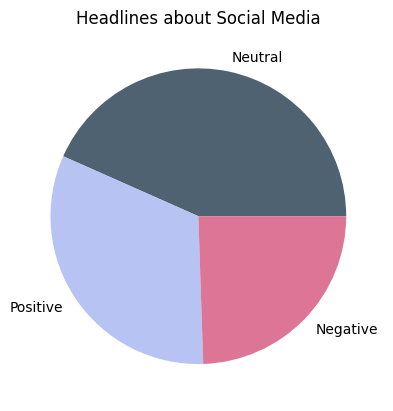

In [142]:
# make a barchart to show discoveries
title_values = [neutral_title ,positive_title, negative_title]
names = 'Neutral', 'Positive', 'Negative',
plt.pie(title_values, labels=names, colors= ['#4F6272', '#B7C3F3', '#DD7596'] )
plt.title("Headlines about Social Media")
plt.show

print(f" Average sentiment of the descriptions of news artitcles = {avg_polarity_titles} (meaning very slightly positive overall )")

In [143]:
article_description = df_api['description']
print(article_description.shape)

description_polarity = []

for description in (article_description):
    blob=TextBlob(description)
   # print('analysing' ,'\t', title)
    polarity = blob.sentiment.polarity
    description_polarity.append(polarity)

#print(description_polarity)
avg_description_polarity= np.average(description_polarity)
print(avg_description_polarity)

(429,)
0.07127453394769413


In [144]:
#change values into positive negative or neutral and count how many of each

description_sentiment = []
positive_description =0
negative_description = 0
neutral_description = 0
for value in description_polarity:
    if value > 0:
        description_sentiment.append("Positive")
        positive_description +=1
    if value == 0:
        description_sentiment.append("Neutral")
        neutral_description +=1
    if value < 0:
        description_sentiment.append("Negative")
        negative_description +=1
        
print(f"When counting each descriptions leaning there are {neutral_description} neutral descriptions,{positive_description} positive descriptions and {negative_description} neagative descriptions")

When counting each descriptions leaning there are 80 neutral descriptions,228 positive descriptions and 121 neagative descriptions


<function matplotlib.pyplot.show(close=None, block=None)>

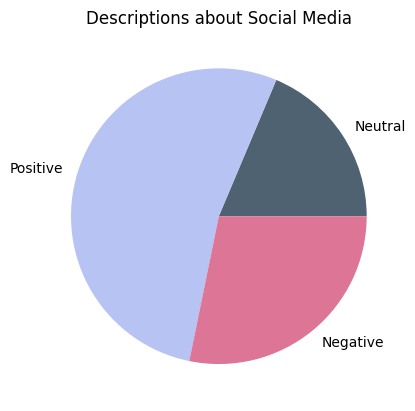

In [145]:
values = [neutral_description,positive_description,negative_description]
names = 'Neutral', 'Positive', 'Negative',
plt.pie(values, labels=names, colors= ['#4F6272', '#B7C3F3', '#DD7596'] )
plt.title("Descriptions about Social Media")
plt.show

In [146]:
print(f" Average sentiment of the descriptions of news artitcles = {avg_description_polarity} (meaning slightly positive overall but only slighlty)")

total_sentiment_df = pd.DataFrame({'title':article_titles, 'title_sentiment': title_sentiment, 'descritpion': article_description, 'description_sentiment': description_sentiment})
total_sentiment_df.head(5)

 Average sentiment of the descriptions of news artitcles = 0.07127453394769413 (meaning slightly positive overall but only slighlty)


,title,title_sentiment,descritpion,description_sentiment
0,Video games may help veterans with mental heal...,Negative,The Entertainment Software Association (ESA) s...,Negative
1,Israeli trauma expert: Children face ‘new kind...,Positive,"Ahead of a London event, Professor Asher Ben-A...",Positive
2,A NeverTrumper’s disingenuous attack on Bondi’...,Neutral,As part of touting Trump’s huge success in blo...,Positive
3,Addiction Capitalism Is A Global Social Sustai...,Positive,What does social sustainability mean for a bus...,Negative
4,Kids and teens under 18 shouldn't use AI compa...,Neutral,Companion-like artificial intelligence apps po...,Negative


### <span style="color:darkorange"> These Graphs Show:

There is a positive association of social media in the news which is more apparent in the descriptions than the headlines, however, a positive opinion is not universal.

## <span style="color:blue"> DATA ANALYSIS

### DATASET 1

The data shows that people spend an average of 1.72 hours per day on social media. Females have a slightly higher addiction score than males, while males report higher self-esteem. Among ages 14 to 19, self-esteem tends to decrease and addiction increases with age. Males also report slightly more anxiety and loneliness during social media use than females

#### Mean Time on Social Media

In [147]:
df = pd.read_csv('clean_dataset_1.csv', header=None)

# Rename the column holding time spent values

time_spent_col = 10 

# Convert the time spent column to numeric

df[time_spent_col] = pd.to_numeric(df[time_spent_col], errors='coerce')

# Drop missing values

df = df.dropna(subset=[time_spent_col])

# Compute mean time spent on social media per day/week/month

mean_per_day = df[time_spent_col].mean()
mean_per_week = mean_per_day * 7
mean_per_month = mean_per_day * 30

# Output the results

print(f"Mean time on social media:")
print(f"Per Day   : {mean_per_day:.2f} hours")
print(f"Per Week  : {mean_per_week:.2f} hours")
print(f"Per Month : {mean_per_month:.2f} hours")

Mean time on social media:
Per Day   : 1.72 hours
Per Week  : 12.04 hours
Per Month : 51.62 hours


#### Average Mental Health Scores by Gender & Age - SM Addiction & Self-Esteem

In [60]:
df = pd.read_csv('clean_dataset_1.csv')

# Clean the column names

df.columns = df.columns.str.strip()

# Rename the mental health columns to easier names

df.rename(columns={
    'BSMAS': 'Social Media Addiction Score',
    'RSES': 'Self-Esteem Score'
}, inplace=True)

# Define which columns are related to mental health

mental_health_cols = ['Social Media Addiction Score', 'Self-Esteem Score']

# Create a new column for gender that labels 1 as Male and 2 as Female

df['Gender'] = df['Sex'].map({1: 'Male', 2: 'Female'})

# Remove rows that have missing data in key columns

df = df.dropna(subset=mental_health_cols + ['Age', 'Gender'])

# Calculate the average mental health scores by Gender

avg_by_gender = df.groupby('Gender')[mental_health_cols].mean().round(2)
print(" Average Mental Health Scores by Gender:\n")
print(avg_by_gender)

# Calculate the average mental health scores by Age

avg_by_age = df.groupby('Age')[mental_health_cols].mean().round(2)
print("\n Average Mental Health Scores by Age:\n")
print(avg_by_age)

 Average Mental Health Scores by Gender:

        Social Media Addiction Score  Self-Esteem Score
Gender                                                 
Female                         13.41              14.96
Male                           12.33              18.06

 Average Mental Health Scores by Age:

     Social Media Addiction Score  Self-Esteem Score
Age                                                 
14                          14.17              19.83
15                          11.87              16.03
16                          12.61              16.91
17                          12.22              15.90
18                          13.17              17.45
19                          14.74              13.91


#### Average Mental Health Scores by Gender - Percieved Anxiety & Loneliness

In [161]:
# Group data by gender to explore differences

df = pd.read_csv('clean_dataset_1.csv')

# Clean column names

df.columns = df.columns.str.strip()

# Create readable gender labels (1 = Male, 2 = Female)

df['Sex'] = df['Sex'].map({1: 'Male', 2: 'Female'})

# Columns related to mental health

mental_health_cols = ['Perceived anxiety during SM use', 'Perceived loneliness']

# Drop rows with missing values in key columns

df = df.dropna(subset=mental_health_cols + ['Age', 'Sex'])

# Group by Gender and calculate average mental health scores

avg_by_gender = df.groupby('Sex')[mental_health_cols].mean().round(2)

# Print average mental health scores by gender

print(" Average Mental Health Scores by Sex:\n")
print(avg_by_gender)

# Calculate the difference between Male and Female mental health scores

gender_diff = avg_by_gender.loc['Male'] - avg_by_gender.loc['Female']

# Print the difference in mental health scores between Male and Female

print("\n Difference in Mental Health Scores between Male and Female:\n")
print(gender_diff.round(2))

 Average Mental Health Scores by Sex:

        Perceived anxiety during SM use  Perceived loneliness
Sex                                                          
Female                             0.86                  0.80
Male                               0.91                  0.92

 Difference in Mental Health Scores between Male and Female:

Perceived anxiety during SM use    0.05
Perceived loneliness               0.12
dtype: float64


#### Summary Statistics

In [149]:
df = pd.read_csv('clean_dataset_1.csv')
df.columns = df.columns.str.strip()
df.head()

,Sex,Age,School failure,Whatsapp,Facebook,Instagram,Twitter,Snapchat,TikTok,Other social,Time spent on social media,Daily use of social media,Which Device,Time flows,Perceived anxiety during SM use,Perceived loneliness,SM checking,BSMAS,RSES
0,2,18,0,1,0,1,0,0,1,0,4,1,0,2,1,1,1,16,26
1,2,19,1,1,1,1,0,0,0,0,1,1,0,2,1,1,1,9,13
2,1,18,0,1,0,1,0,0,0,0,2,1,0,1,1,1,0,21,18
3,1,17,1,1,1,1,0,0,1,0,5,1,2,1,1,1,3,12,19
4,1,17,0,1,0,1,0,0,0,0,1,1,0,2,0,0,1,11,18


In [150]:
# Group the data by gender and calculate the average self-esteem (RSES), social media addiction (BSMAS), and loneliness for each gender

gender_group = df.groupby('Sex')[['RSES', 'BSMAS', 'Perceived loneliness']].mean().round(2)

# Print the grouped averages

print(gender_group)

      RSES  BSMAS  Perceived loneliness
Sex                                    
1    18.06  12.33                  0.92
2    14.96  13.41                  0.80


In [151]:
# Group the data by age and calculate the average scores for: loneliness, anxiety during social media use, frequency of social media checking

age_group = df.groupby('Age')[['Perceived loneliness', 'Perceived anxiety during SM use', 'SM checking']].mean().round(2)

# Print the age based averages

print(age_group)

     Perceived loneliness  Perceived anxiety during SM use  SM checking
Age                                                                    
14                   1.00                             1.00         0.83
15                   0.58                             1.03         1.29
16                   0.83                             0.85         0.87
17                   0.88                             0.84         0.98
18                   1.00                             0.92         0.92
19                   0.80                             0.77         1.29


In [152]:
# Calculate the correlation between time spent on social media and other mental health indicators

correlation = df[['Time spent on social media', 'RSES', 'Perceived loneliness', 'Perceived anxiety during SM use', 'BSMAS']].corr()

# Get only the correlations related to 'Time spent on social media', and round them to 2 decimal places

correlation_with_time = correlation['Time spent on social media'].drop('Time spent on social media').round(2)
# Print the correlation values (e.g. time spent vs self-esteem)

print(correlation_with_time)

RSES                              -0.25
Perceived loneliness              -0.13
Perceived anxiety during SM use   -0.23
BSMAS                              0.10
Name: Time spent on social media, dtype: float64


In [153]:
# Count how many teens spend each amount of time on social media (0 to 5 hours)

time_distribution = df['Time spent on social media'].value_counts().sort_index()

# Calculate the percentage of teens for each time amount

time_percent = (time_distribution / len(df) * 100).round(2)

# Create a tidy table with both counts and percentages

time_table = pd.DataFrame({
    'Time Spent (hours/day)' : time_distribution.index,
    'Number of Teens' : time_distribution.values,
    'Percentage of Teens (%)' : time_percent.values
})
# Print the final time usage breakdown

print(time_table)

   Time Spent (hours/day)  Number of Teens  Percentage of Teens (%)
0                       0               27                    11.79
1                       1               90                    39.30
2                       2               60                    26.20
3                       3               33                    14.41
4                       4               10                     4.37
5                       5                9                     3.93


### <span style="color:darkorange"> These Graphs Show:

- Most people in data set 1 reported feeling the same levels of anxiety and loneliness from using social media.
- These show that generally reported no change to loneliness or anxiety based on social media use, there were more females in the study than males which results in the higher bars.
- Also this is loneliness and anxiety as percieved by the teenager filling out the study who might not be aware or willing to share negative impacts it is having on their mental health.

#### Time Spent on Social Media & Mental Health

In [154]:
df1 = pd.read_csv('clean_dataset_1.csv')

# Time labels for graphs:

time_labels = {0: '0–1h', 1: '1–2h', 2: '2–3h', 3: '3–4h', 4: '4–5h', 5: '5h+'}
df['Time Category'] = df['Time spent on social media'].map(time_labels)
ordered_categories = ['0–1h', '1–2h', '2–3h', '3–4h', '4–5h', '5h+']

In [209]:
grouped_means = df.groupby('Time Category')[['RSES', 'BSMAS', 'Perceived loneliness', 'Perceived anxiety during SM use']].mean()
grouped_means = grouped_means.loc[ordered_categories]

# Graph 1 (Self esteem & Social Media addiction vs Time Spend on Social Media)

plt.figure(figsize=(10, 5))
plt.plot(grouped_means.index, grouped_means['RSES'], label='RSES (Self-esteem)', marker='o', color='#DDA0DD')
plt.plot(grouped_means.index, grouped_means['BSMAS'], label='BSMAS (SM Addiction)', marker='o', color='#800080')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('RSES & BSMAS (Mean Score)')
plt.title('Self Esteem and Social Media Addiction vs Time Spent on Social Media')
plt.legend(title='Questionaires:')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2 (Percieved Anxiety and Loneliness vs Time spent on Social Media)

plt.figure(figsize=(10, 5))
plt.plot(grouped_means.index, grouped_means['Perceived anxiety during SM use'], label='Perceived Anxiety', marker='o', color='#FFC0CB')
plt.plot(grouped_means.index, grouped_means['Perceived loneliness'], label='Perceived Loneliness', marker='o', color='#76b7b2')
plt.xlabel('Time Spent on Social Media (Hours)')
plt.ylabel('Anxiety & Loneliness rating (Mean Score)')
plt.title('Percieved Anxiety and Loneliness vs Time Spent on Social Media')
plt.legend(title='Emotional States:')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Time Category'

In [156]:
# Platform Label for Graphs:

platform_columns = ['Whatsapp', 'Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other social']


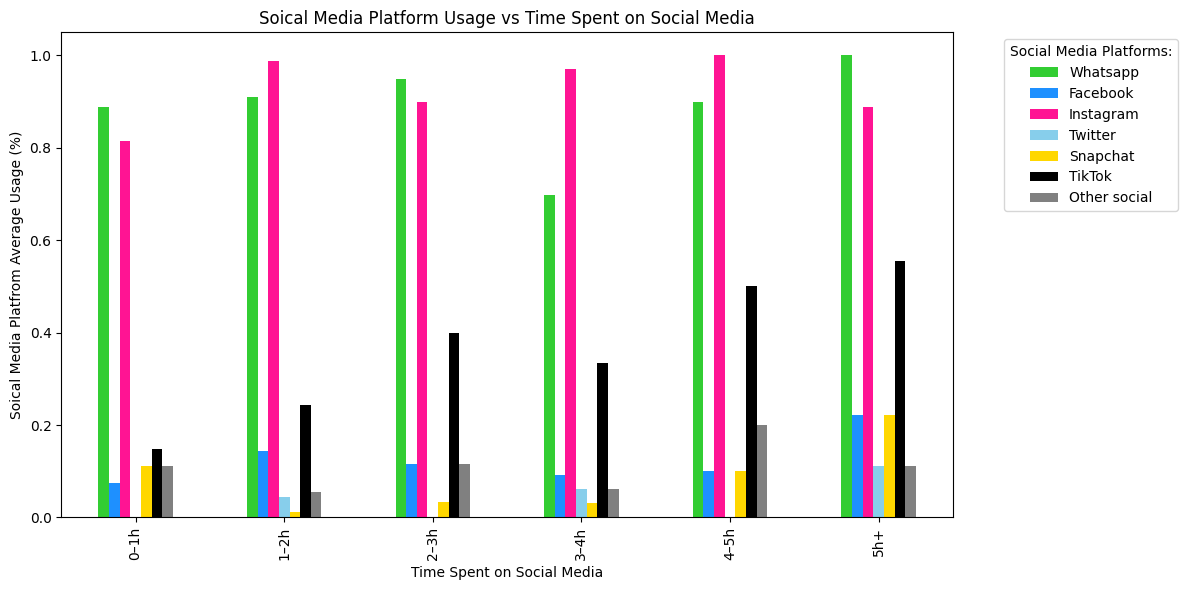

In [157]:
grouped_platform = df.groupby('Time Category')[platform_columns].mean()
grouped_platform = grouped_platform.reindex(ordered_categories)

ax = grouped_platform.plot(kind='bar', figsize=(12, 6), color=['limegreen', 'dodgerblue', 'deeppink', 'skyblue', 'gold', 'black', 'grey'])

plt.xlabel('Time Spent on Social Media')
plt.ylabel('Social Media Platfrom Average Usage (%)')
plt.title('Social Media Platform Usage vs Time Spent on Social Media')
plt.legend(title='Social Media Platforms:', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

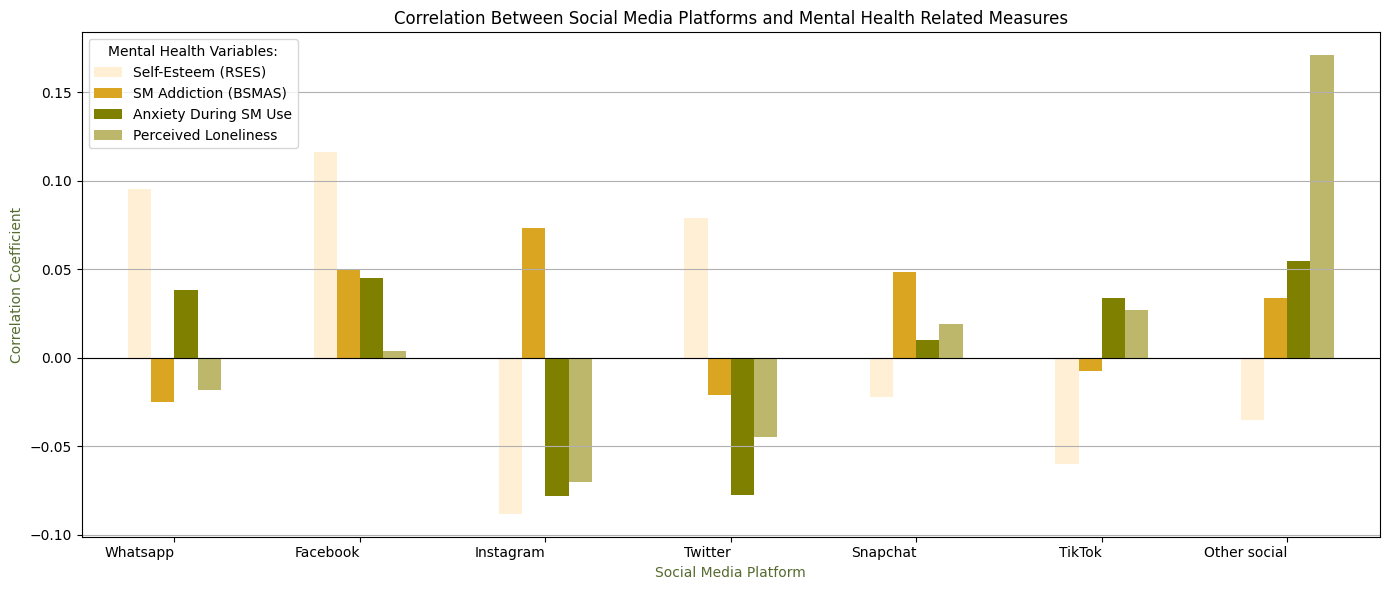

In [158]:
# Corelation between SM platforms and Mental Health

correlations = df[platform_columns + ['RSES']].corr()
self_esteem_corr = correlations['RSES'].drop('RSES')
correlations = df[platform_columns + ['BSMAS']].corr()
sm_addiction_corr = correlations['BSMAS'].drop('BSMAS')
correlations = df[platform_columns + ['Perceived anxiety during SM use']].corr()
anxiety_corr = correlations['Perceived anxiety during SM use'].drop('Perceived anxiety during SM use')

correlations = df[platform_columns + ['Perceived loneliness']].corr()
loneliness_corr = correlations['Perceived loneliness'].drop('Perceived loneliness')


grouped_df = pd.DataFrame({'Self-Esteem (RSES)': self_esteem_corr,'SM Addiction (BSMAS)': sm_addiction_corr,'Anxiety During SM Use': anxiety_corr,'Perceived Loneliness': lonliness_corr})

ax = grouped_df.plot(kind='bar', figsize=(14, 6), color=['papayawhip', 'goldenrod', 'olive', 'darkkhaki'])
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Correlation Between Social Media Platforms and Mental Health Related Measures')
plt.xlabel('Social Media Platform', color='darkolivegreen')
plt.ylabel('Correlation Coefficient', color='darkolivegreen')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Mental Health Variables:')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### <span style="color:darkorange"> These Graphs Show:

- A slight increase in social media addiction the more hours a day they spent on social media platforms
- Lower self-esteem in teens who spend more time on social media
- Less chance of feeling anixious and lonely in teenangers who spent more time on social media
- Whatsapp and Instagram are the most popular platforms
- There are more tiktok and snapchat users in those who spend more time on social media
"other" platforms cause the most effect on mental health variables
- Twitter causes the least effect on mental health variables (it is also the least popular in this age range)
- There is a negative correlation between self=esteem and platforms related to sharing images and videos (TikTok, SnapChat and Instagram)
- Most social media platforms have a positive correlation with feeling anxious

#### Time Spent on Social Media & Mental Health by Sex

In [162]:
df = pd.read_csv('clean_dataset_1.csv')

In [163]:
anxiety = df.groupby('Perceived anxiety during SM use')['Sex'].count()
print(anxiety)

Perceived anxiety during SM use
0     32
1    192
2      5
Name: Sex, dtype: int64


<BarContainer object of 3 artists>

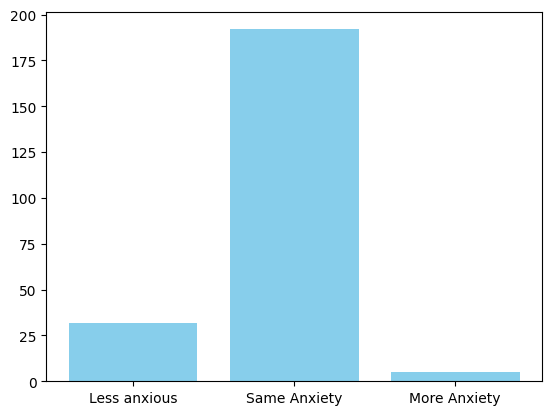

In [82]:
custom_index = ['Less anxious', 'Same Anxiety', 'More Anxiety']
plt.bar(custom_index, anxiety.values, color='skyblue')

In [83]:
df_anxiety = (df[['Sex', 'Perceived anxiety during SM use']])
anxiety_sex_grouped = df_anxiety.groupby(['Perceived anxiety during SM use', 'Sex']).size().unstack()
print(anxiety_sex_grouped)

Sex                               1    2
Perceived anxiety during SM use         
0                                10   22
1                                90  102
2                                 1    4


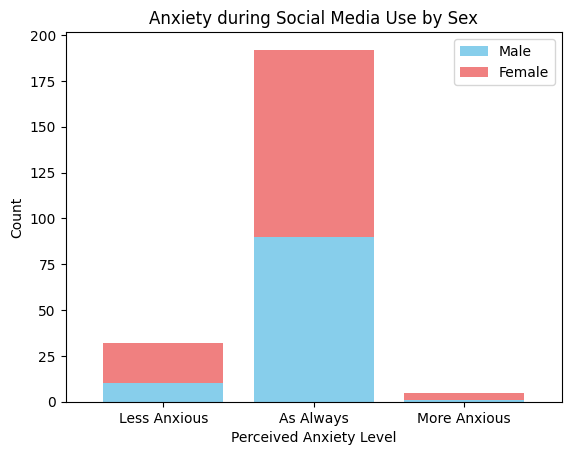

In [164]:
anxiety_sex_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], width = 0.80)

# Add labels and title

custom_index = ('Less Anxious', 'As Always', 'More Anxious')
plt.title("Anxiety during Social Media Use by Sex")
plt.xlabel("Perceived Anxiety Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1, 2], labels=custom_index)

plt.legend (['Male','Female'])

# Show the plot

plt.show()

In [165]:
df_loneliness = (df[['Sex', 'Perceived loneliness']])
loneliness_grouped = df.groupby(['Perceived loneliness','Sex']).size().unstack()
print(loneliness_grouped)

Sex                    1   2
Perceived loneliness        
0                     16  37
1                     77  80
2                      8  11


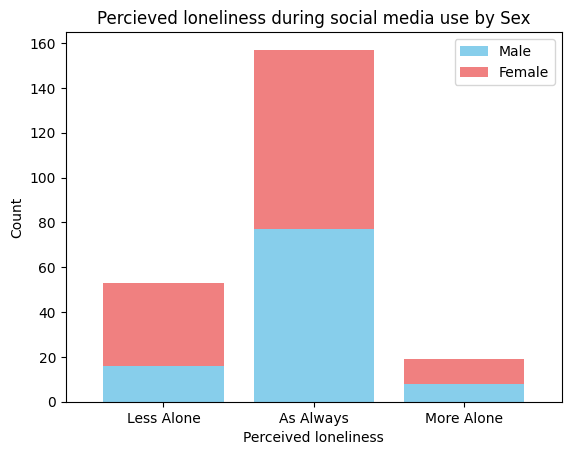

In [166]:
loneliness_grouped.plot(kind='bar',
                        stacked = True,
                       color =['skyblue', 'lightcoral'],
                       width = 0.8,
                       )

custom_loneliness_lables = ('Less Alone', 'As Always', 'More Alone')
plt.xticks(ticks=[0, 1, 2], labels=custom_loneliness_lables, rotation=0)
plt.title("Percieved loneliness during social media use by Sex")
plt.legend(["Male", "Female"])
plt.ylabel("Count")

plt.show()

### <span style="color:darkorange"> These Graphs Show:

- Most particpants both male and female said that their anxiety was the same level as always whilst using social media.
- This was the same for feeling lonely
- More males than females felt less alone

#### Time Spent on Social Media & Mental Health by Age

In [167]:
df1 = pd.read_csv('clean_dataset_1.csv')
df1.dtypes

Sex                                int64
Age                                int64
School failure                     int64
Whatsapp                           int64
Facebook                           int64
Instagram                          int64
Twitter                            int64
Snapchat                           int64
TikTok                             int64
Other social                       int64
Time spent on social media         int64
Daily use of social media          int64
Which Device                       int64
Time flows                         int64
Perceived anxiety during SM use    int64
Perceived loneliness               int64
SM checking                        int64
BSMAS                              int64
RSES                               int64
dtype: object

In [168]:
df1.head()

,Sex,Age,School failure,Whatsapp,Facebook,Instagram,Twitter,Snapchat,TikTok,Other social,Time spent on social media,Daily use of social media,Which Device,Time flows,Perceived anxiety during SM use,Perceived loneliness,SM checking,BSMAS,RSES
0,2,18,0,1,0,1,0,0,1,0,4,1,0,2,1,1,1,16,26
1,2,19,1,1,1,1,0,0,0,0,1,1,0,2,1,1,1,9,13
2,1,18,0,1,0,1,0,0,0,0,2,1,0,1,1,1,0,21,18
3,1,17,1,1,1,1,0,0,1,0,5,1,2,1,1,1,3,12,19
4,1,17,0,1,0,1,0,0,0,0,1,1,0,2,0,0,1,11,18


In [169]:
df1 = df1.sort_values(by="Age")
df1.head()

,Sex,Age,School failure,Whatsapp,Facebook,Instagram,Twitter,Snapchat,TikTok,Other social,Time spent on social media,Daily use of social media,Which Device,Time flows,Perceived anxiety during SM use,Perceived loneliness,SM checking,BSMAS,RSES
228,1,14,0,1,0,1,1,0,1,0,1,1,2,2,1,1,0,17,21
133,2,14,0,1,0,1,0,0,1,0,3,1,0,2,1,1,3,7,21
47,1,14,0,1,0,1,0,0,1,1,0,1,0,2,1,1,0,17,12
9,2,14,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,13,24
183,2,14,0,1,0,1,0,0,1,0,2,1,0,2,1,1,1,14,21


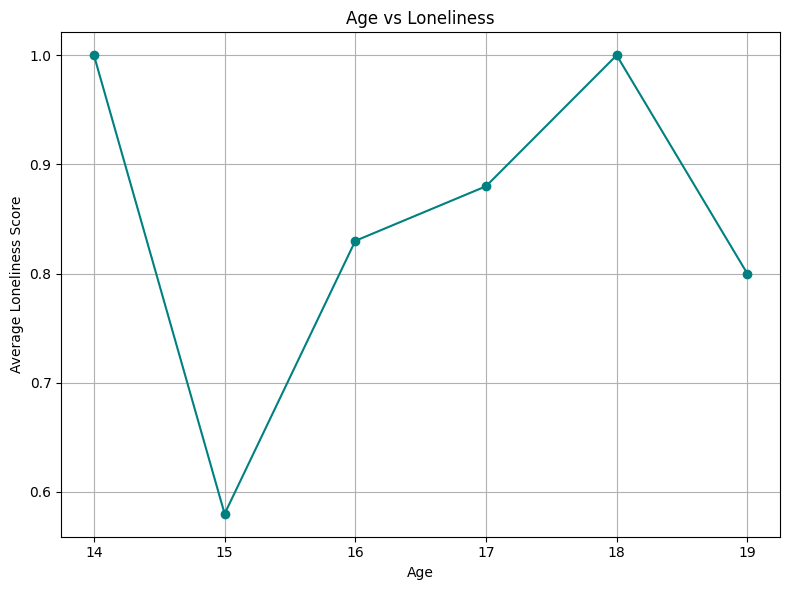

In [170]:
# Average Loneliness by Age

avg_loneliness = df1.groupby("Age")["Perceived loneliness"].mean().round(2).reset_index()

# Line Plot Age Vs Loneliness

plt.figure(figsize=(8,6))
plt.plot(avg_loneliness["Age"],avg_loneliness["Perceived loneliness"], color='teal', marker='o', linestyle='-')
plt.title("Age vs Loneliness")
plt.xlabel("Age")
plt.ylabel("Average Loneliness Score")
plt.grid(True)
plt.tight_layout()
plt.show()

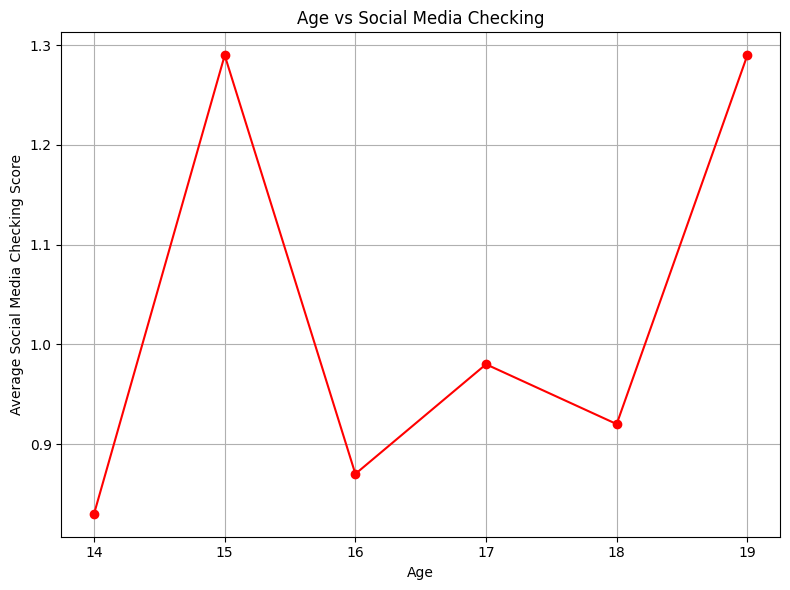

In [171]:
# Age Vs Social Media Checking

# Average SM Checking by Age
avg_sm_checking = df1.groupby("Age")["SM checking"].mean().round(2).reset_index()

# Line Plot Age Vs SM Checking
plt.figure(figsize=(8,6))
plt.plot(avg_sm_checking["Age"],avg_sm_checking["SM checking"], color='red', marker='o', linestyle='-')
plt.title("Age vs Social Media Checking")
plt.xlabel("Age")
plt.ylabel("Average Social Media Checking Score")
plt.grid(True)
plt.tight_layout()
plt.show()

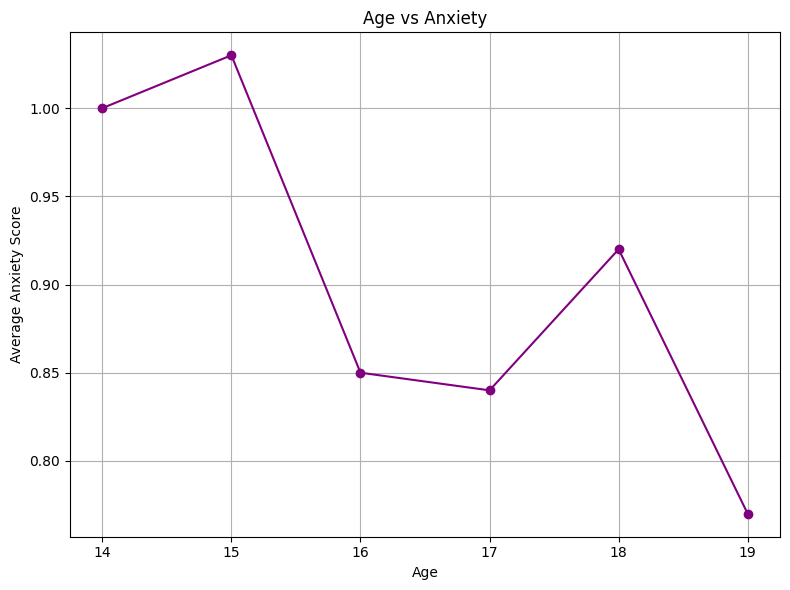

In [172]:
# Age Vs Anxiety (during use)

# Average Anxiety by Age
avg_anxiety = df1.groupby("Age")["Perceived anxiety during SM use"].mean().round(2).reset_index()

# Line Plot Age Vs SM Checking

plt.figure(figsize=(8,6))
plt.plot(avg_anxiety["Age"],avg_anxiety["Perceived anxiety during SM use"], color='purple', marker='o', linestyle='-')
plt.title("Age vs Anxiety")
plt.xlabel("Age")
plt.ylabel("Average Anxiety Score")
plt.grid(True)
plt.tight_layout()
plt.show()

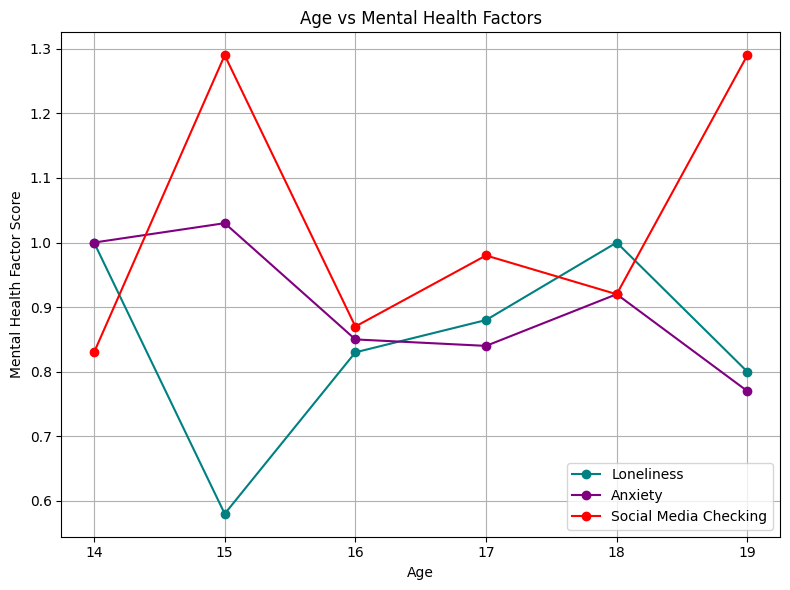

In [173]:
# Age Vs Trends

plt.figure(figsize=(8,6))
plt.plot(avg_loneliness["Age"],avg_loneliness["Perceived loneliness"], color='teal', marker='o', linestyle='-', label ="Loneliness")
plt.plot(avg_anxiety["Age"],avg_anxiety["Perceived anxiety during SM use"], color='purple', marker='o', linestyle='-', label ="Anxiety")
plt.plot(avg_sm_checking["Age"],avg_sm_checking["SM checking"], color='red', marker='o', linestyle='-', label ="Social Media Checking")
plt.title("Age vs Mental Health Factors")
plt.xlabel("Age")
plt.ylabel("Mental Health Factor Score")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### <span style="color:darkorange"> These Graphs Show:

- Older teens generally experience slightly less anxiety but check their social media more.
- Fifteen year olds - check their social media the most, have the highest levels of anxiety and lowest levels of perceived loneliness

### Dataset 2 - Merge with Dataset 1

In [174]:
df2 = pd.read_csv("clean_dataset_2.csv")
df2.head()

,Age,Sex,Social_Media_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,School failure
0,16,2,4,5.0,4,1,0
1,17,1,4,9.0,2,2,0
2,15,1,2,5.0,4,0,1
3,17,2,4,5.0,4,2,0
4,17,2,0,6.0,5,2,1


In [175]:
df1.head()

,Sex,Age,School failure,Whatsapp,Facebook,Instagram,Twitter,Snapchat,TikTok,Other social,Time spent on social media,Daily use of social media,Which Device,Time flows,Perceived anxiety during SM use,Perceived loneliness,SM checking,BSMAS,RSES
228,1,14,0,1,0,1,1,0,1,0,1,1,2,2,1,1,0,17,21
133,2,14,0,1,0,1,0,0,1,0,3,1,0,2,1,1,3,7,21
47,1,14,0,1,0,1,0,0,1,1,0,1,0,2,1,1,0,17,12
9,2,14,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,13,24
183,2,14,0,1,0,1,0,0,1,0,2,1,0,2,1,1,1,14,21


In [176]:
# Dataset 1 & 2 Time Spent on Social Media, Age, School Failure are common

df1 = df1[["Age", "Time spent on social media", "School failure"]]
df2 = df2[["Age", "Social_Media_Hours", "School failure"]]
df1.head()

,Age,Time spent on social media,School failure
228,14,1,0
133,14,3,0
47,14,0,0
9,14,1,0
183,14,2,0


In [177]:
df2.head()

,Age,Social_Media_Hours,School failure
0,16,4,0
1,17,4,0
2,15,2,1
3,17,4,0
4,17,0,1


In [178]:
# Rename Social Media Column in df1

df1 = df1.rename(columns = {"Time spent on social media": "Social_Media_Hours", "School Failure" : "School failure"})
df1.head()

,Age,Social_Media_Hours,School failure
228,14,1,0
133,14,3,0
47,14,0,0
9,14,1,0
183,14,2,0


In [179]:
# Dataset 1 & 2 Time Spent on Social Media, Age, School Failure

df1_df2 = pd.concat([df1, df2], ignore_index = True)
df1_df2.head()

,Age,Social_Media_Hours,School failure
0,14,1,0
1,14,3,0
2,14,0,0
3,14,1,0
4,14,2,0


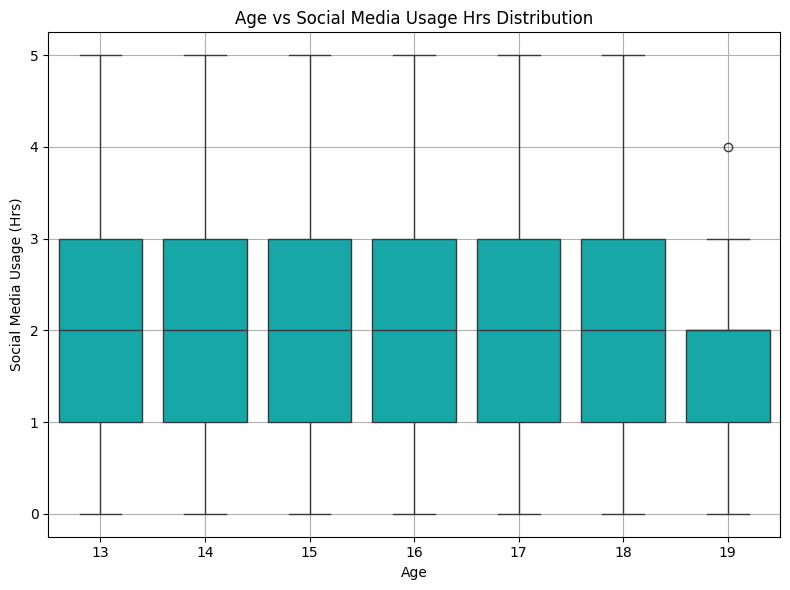

In [103]:
# Dataset 1 & 2 Age Vs Time Spent on Social Media Box Plot Distribution

plt.figure(figsize=(8,6))
sns.boxplot(x = df1_df2["Age"], y = df1_df2["Social_Media_Hours"], color='c')
plt.title("Age vs Social Media Usage Hrs Distribution")
plt.xlabel("Age")
plt.ylabel("Social Media Usage (Hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

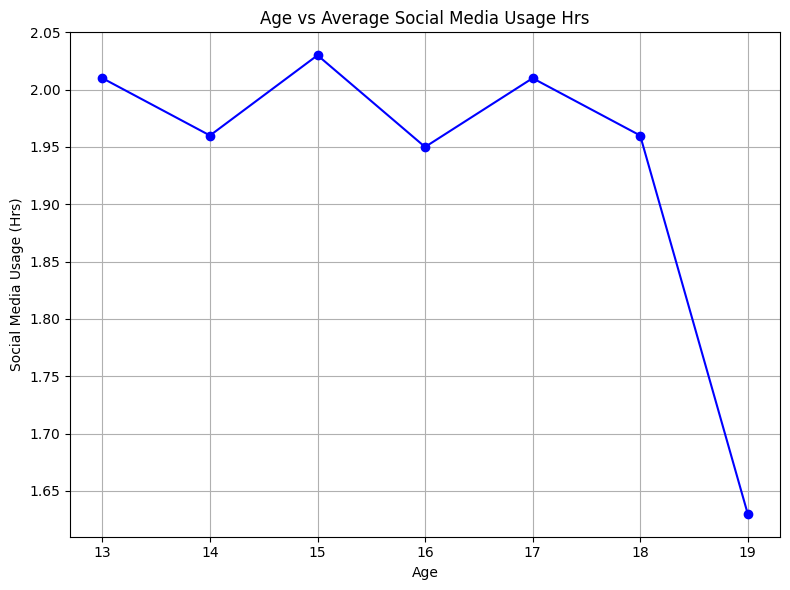

In [207]:
# Age Vs Social Media Use Average

# Average Anxiety by Age
avg_usage = df1_df2.groupby("Age")["Social_Media_Hours"].mean().round(2).reset_index()

# Line Plot Age Vs SM Use

plt.figure(figsize=(8,6))
plt.plot(avg_usage["Age"],avg_usage["Social_Media_Hours"], color='blue', marker='o', linestyle='-')
plt.title("Age vs Average Social Media Usage Hrs")
plt.xlabel("Age")
plt.ylabel("Social Media Usage (Hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

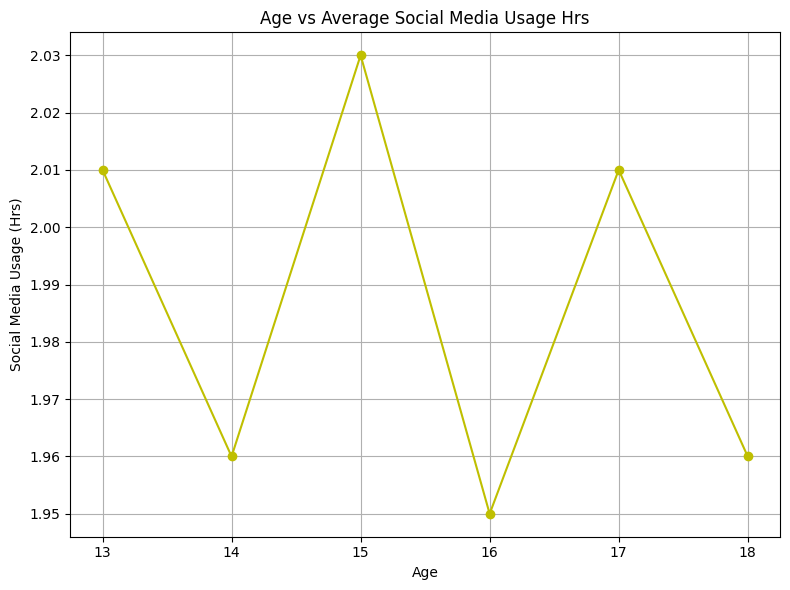

In [208]:
# Age Vs Social Media Use Average Removing Anomoly

# Remove Anamoly

remove_anamoly = df1_df2[~((df1_df2["Age"] == 19))]
# Average Anxiety by Age Remove Anamoly
avg_usage_no_anam = remove_anamoly.groupby("Age")["Social_Media_Hours"].mean().round(2).reset_index()
# Line Plot Age Vs SM Use
plt.figure(figsize=(8,6))
plt.plot(avg_usage_no_anam["Age"],avg_usage_no_anam["Social_Media_Hours"], color='y', marker='o', linestyle='-')
plt.title("Age vs Average Social Media Usage Hrs")
plt.xlabel("Age")
plt.ylabel("Social Media Usage (Hrs)")
plt.grid(True)
plt.tight_layout()
plt.show()

### <span style="color:darkorange"> These Graphs Show:

- Social media useage is consistent across different age teens apart from 19 year olds
- As the data from 19 year olds was skewing the data, we decided to remove them
- Now the dataset shows social media usage is consistent across ages

### Dataset 3 - Comparing Findings to Data about Adults and Social Media Usage

#### Means and Averages for Time on Social Media

In [195]:
#Calculate mean time on social media per day/week/month

# Load the data
df = pd.read_csv('clean_dataset_3.csv')

#Calculate mean time per day
mean_daily_hours = df['Social Media Hours'].mean()

#Calculate weekly and monthly estimates
mean_weekly_hours = mean_daily_hours * 7
mean_monthly_hours = mean_daily_hours * 30

#Display results
print(f"Average time on social media:")
print(f"- Per Day: {mean_daily_hours:.2f} hours")
print(f"- Per Week: {mean_weekly_hours:.2f} hours")
print(f"- Per Month: {mean_monthly_hours:.2f} hours")

Average time on social media:
- Per Day: 3.21 hours
- Per Week: 22.47 hours
- Per Month: 96.29 hours


In [196]:
#Find average How Often Feel Depressed or Down from data could do by age and gender?

# Load the dataset
df = pd.read_csv('clean_dataset_3.csv')

# Display column names
#print("Columns:", df.columns.tolist())

# Check for missing values in key columns (Age, Sex, and How Often Feel Depressed or Down)
missing_values = df[['Age', 'Sex', 'How Often Feel Depressed or Down']].isnull().sum()

# Clean data: drop rows with missing values in the target columns
df_cleaned = df.dropna(subset=['Age', 'Sex', 'How Often Feel Depressed or Down'])

# Convert 'Sex' to numeric codes
df_cleaned['Sex'] = pd.to_numeric(df_cleaned['Sex'], errors='coerce')

#Map the numeric codes and non-standard values
sex_map = {
    1: 'Male',
    2: 'Female',
    'Nonbinary': 'Nonbinary',
    'There are others???': 'Other'
}

# Clean the 'Sex' column based on the mapping
df_cleaned['Sex'] = df_cleaned['Sex'].map(sex_map).fillna('Other')  # Handle unmatched values as 'Other'

# Age - Calculate the average 'How Often Feel Depressed or Down' by Age
avg_by_age = df_cleaned.groupby('Age')['How Often Feel Depressed or Down'].mean().round(2)
print("\nAverage 'How Often Feel Depressed or Down' by Age:")
print(avg_by_age)

# Gender - Calculate the average 'How Often Feel Depressed or Down' by Gender
avg_by_gender = df_cleaned.groupby('Sex')['How Often Feel Depressed or Down'].mean().round(2)
print("\nAverage 'How Often Feel Depressed or Down' by Sex:")
print(avg_by_gender)



Average 'How Often Feel Depressed or Down' by Age:
Age
21.0    3.57
22.0    3.36
23.0    3.60
24.0    3.50
25.0    3.82
26.0    3.65
26.7    4.00
27.0    3.36
28.0    4.20
29.0    3.83
30.0    3.50
Name: How Often Feel Depressed or Down, dtype: float64

Average 'How Often Feel Depressed or Down' by Sex:
Sex
Female    3.58
Male      3.49
Other     2.50
Name: How Often Feel Depressed or Down, dtype: float64


In [205]:
#Group data by gender to explore differences

# Load the dataset
df = pd.read_csv('clean_dataset_3.csv')

# Gender - Calculate the average 'How Often Feel Depressed or Down' by Gender
avg_by_gender = df_cleaned.groupby('Sex')['How Often Feel Depressed or Down'].mean().round(2)
print("\nAverage 'How Often Feel Depressed or Down' by Sex:")
print(avg_by_gender)

# Calculate the difference between Male and Female mental health scores
gender_diff = avg_by_gender.loc['Male'] - avg_by_gender.loc['Female']

# Print the difference in mental health scores between Male and Female
print("\n Difference in Mental Health Scores between Male and Female:\n")
print(gender_diff.round(2))


Average 'How Often Feel Depressed or Down' by Sex:
Sex
Female    3.58
Male      3.49
Other     2.50
Name: How Often Feel Depressed or Down, dtype: float64

 Difference in Mental Health Scores between Male and Female:

-0.09


### <span style="color:darkorange"> These Findings Show:

- People spend an average of 3.21 hours per day on social media.
- Feelings of depression are fairly steady across ages 21 to 30, but slightly higher in the late 20s.
- Females report feeling more depressed (3.58) than males (3.49), though the difference is small.
- Overall, depression levels are moderate, with slight differences by age and gender

#### Time Spent on Social Media and Feeling Depressed

In [198]:
df3 = pd.read_csv("clean_dataset_3.csv")
df3.head()

,Age,Sex,Facebook,Instagram,Twitter,Snapchat,TikTok,Other,Social Media Hours,How Often Feel Depressed or Down,How Often Issues with Sleep
0,21.0,1,1,1,1,0,0,1,2,5,5
1,21.0,2,1,1,1,0,0,1,5,5,5
2,21.0,2,1,1,0,0,0,1,3,4,5
3,21.0,2,1,1,0,0,0,0,5,4,2
4,21.0,2,1,1,0,0,0,1,2,4,1


In [199]:
# labels for time catagories

time_labels = {
    0: '0–1h',
    1: '1–2h',
    2: '2–3h',
    3: '3–4h',
    4: '4–5h',
    5: '5h+'
}
df3['Time Category'] = df3['Social Media Hours'].map(time_labels)

time_categories = ['0–1h', '1–2h', '2–3h', '3–4h', '4–5h', '5h+']
#df3[['Social Media Hours', 'Time Category']].head(10)

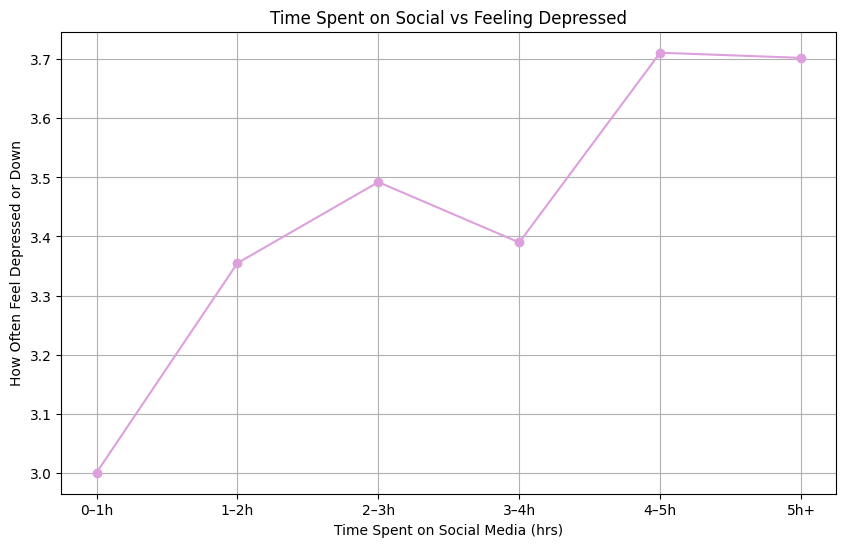

In [200]:
avg_depression = df3.groupby('Time Category')[['How Often Feel Depressed or Down']].mean().reindex(time_categories)


plt.figure(figsize=(10, 6))
plt.plot(avg_depression.index, avg_depression['How Often Feel Depressed or Down'], marker='o', color='#DDA0DD')
plt.title('Time Spent on Social vs Feeling Depressed')
plt.xlabel('Time Spent on Social Media (hrs)')
plt.ylabel('How Often Feel Depressed or Down')
plt.grid(True)
plt.show()

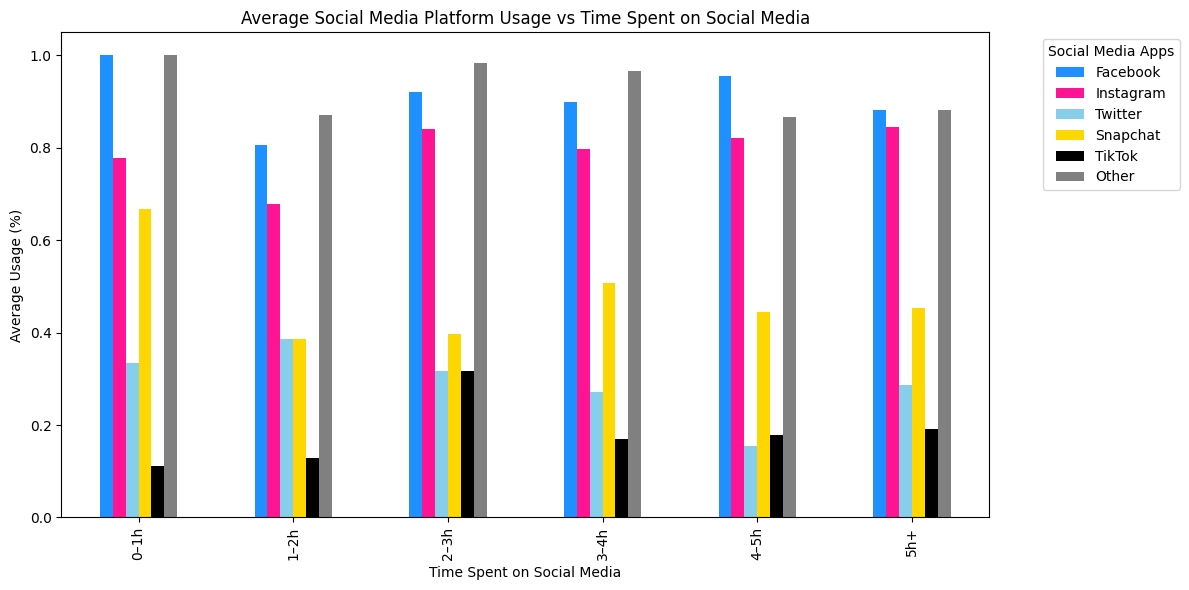

In [201]:
platform = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Other']
grouped_platform = df3.groupby('Time Category')[platform].mean()
grouped_platform = grouped_platform.reindex(time_categories)

ax = grouped_platform.plot(kind='bar', figsize=(12, 6),
                       color=['dodgerblue', 'deeppink', 'skyblue', 'gold', 'black', 'grey'])

plt.xlabel('Time Spent on Social Media')
plt.ylabel('Average Usage (%)')
plt.title('Average Social Media Platform Usage vs Time Spent on Social Media')
plt.legend(title='Social Media Apps', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

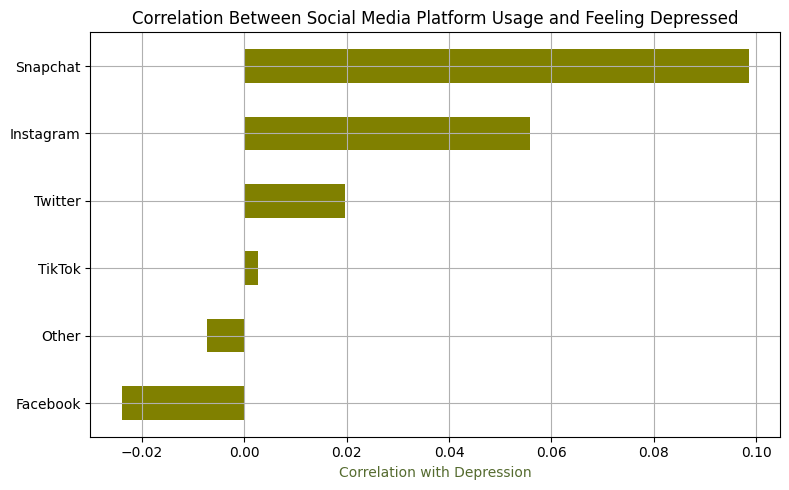

In [202]:
correlations = df3[platform + ['How Often Feel Depressed or Down']].corr()
depression_corr = correlations['How Often Feel Depressed or Down'].drop('How Often Feel Depressed or Down')

plt.figure(figsize=(8, 5))
depression_corr.sort_values().plot(kind='barh', color='olive')
plt.title('Correlation Between Social Media Platform Usage and Feeling Depressed')
plt.xlabel('Correlation with Depression', color='darkolivegreen')
plt.grid(True)
plt.tight_layout()
plt.show()

### <span style="color:darkorange"> These Graphs Show:

- The line graph shows that the more young adults spend on social media, the more likely they are to feel depressed.
- Facebook, Instagram and "Other" social media platfroms are most popular amongst young adults
- The more time is spent on social media, the more likely they are to use TikTok and snapchat
- Tiktok has the highest positive correlation with feeling depressed
- All social media apps have a positive correlation with feeling depressed expect for "other" (which is the most popluar app catagory for this age range)


#### Time Spent on Social Media and Feeling Depressed by Sex

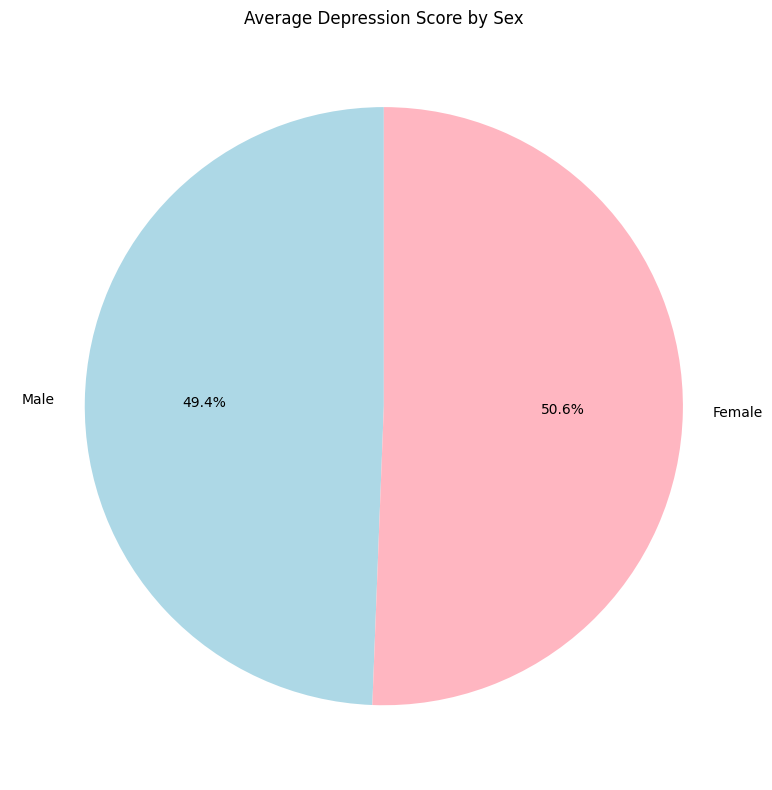

In [203]:
df3['Sex'] = df3['Sex'].astype(str).map({'1': 'Male', '2': 'Female'})
depression_by_sex= df3.groupby('Sex')['How Often Feel Depressed or Down'].mean().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(depression_by_sex, labels=depression_by_sex.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Average Depression Score by Sex')
plt.tight_layout()
plt.show()

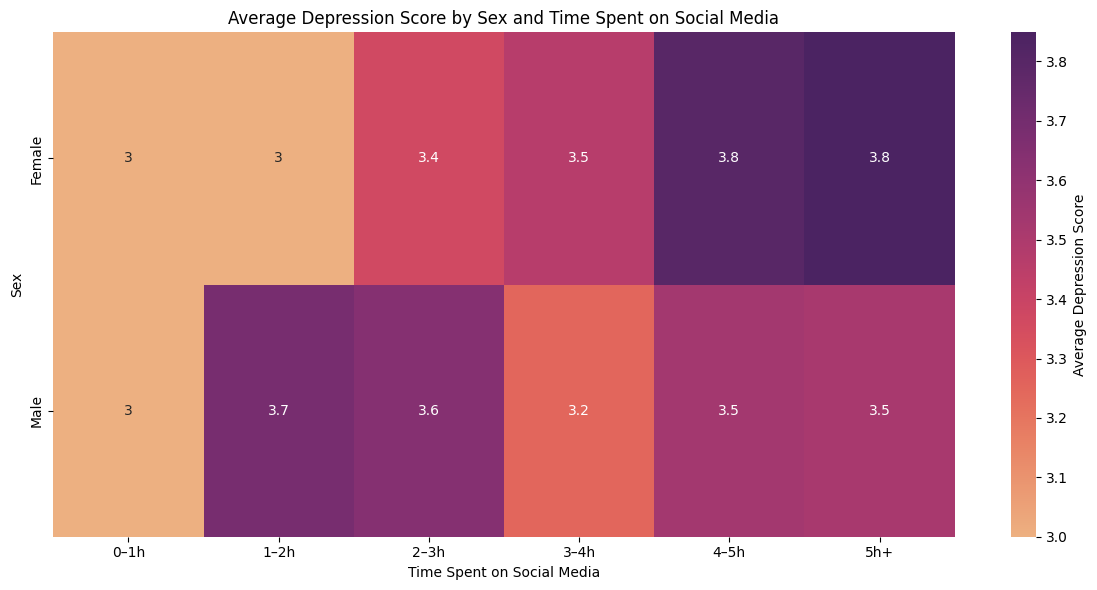

In [204]:
depression_by_sex_time = df3.groupby(['Sex', 'Time Category'])['How Often Feel Depressed or Down'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(depression_by_sex_time, annot=True, cmap='flare', cbar_kws={'label': 'Average Depression Score'})
plt.title('Average Depression Score by Sex and Time Spent on Social Media')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

### <span style="color:darkorange"> These Graphs Show:

- There is a 50/50 chance in males and females to feel depressed in general
- When comparing that to time spend on social media, the heatmap shows there in a increase in females feeling depressed the more time they spend on social media.

## <span style="color:blue"> CONCLUSION

In conclusion, social media’s impact on teenage mental health is complex, with both positive and negative effects observed. While high usage links to lower self-esteem, moderate use may offer emotional support. Ongoing expert input and guidance from parents, teachers, governments and social media companies are vital for balanced usage.